<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [1]:
import pandas as pd

In [2]:
datos=pd.read_csv('/content/prestacar.csv')
datos.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingresos_cliente    54025 non-null  float64
 1   anualidad_prestamo  54025 non-null  float64
 2   años_casa_propia    54025 non-null  float64
 3   telefono_trab       54025 non-null  int64  
 4   evaluacion_ciudad   54025 non-null  float64
 5   score_1             54025 non-null  float64
 6   score_2             54025 non-null  float64
 7   score_3             54025 non-null  float64
 8   score_social        54025 non-null  float64
 9   cambio_telefono     54025 non-null  float64
 10  moroso              54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


secmentacion del conjunto de datos para tener las variables explicativas y nuestra variable de respuesta

In [4]:
x=datos.drop('moroso',axis=1)
y=datos['moroso']

utilizando el modelo de clasificacion del arbol

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo=DecisionTreeClassifier()
modelo.fit(x,y)
modelo.score(x,y)

1.0

In [7]:
print(f'La exactitud del modelo es: {modelo.score(x,y)}')

La exactitud del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

este paquete lo que hace es separar la base de entrenamiento y la base de prueba nustros datos

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x,x_test,y,y_test=train_test_split(x,y,test_size=0.15,stratify=y,random_state=5)
x_train,x_val,y_train,y_val=train_test_split(x,y,stratify=y,random_state=5)

repetimos la missma linea y parametros para la validacion

In [10]:
modelo=DecisionTreeClassifier()
modelo.fit(x_train,y_train)
print(f'La exactitud del modelo del conjunto de entrenamiento es: {round(modelo.score(x_train,y_train))}')
print(f'La exactitud del modelo del conjunto de validacion es: {round(modelo.score(x_val,y_val),2)}')

La exactitud del modelo del conjunto de entrenamiento es: 1
La exactitud del modelo del conjunto de validacion es: 0.85


a la hora de correr el modelo de entrenamiento hizo 100% pero a la hora de validar hizo 85%, que quiere decir que mi modelo de arbol se memoriso todas las salidas y por eso llego al 100% y al momento de colocar datos que no habia visto por eso llego al 85%, esta no es la mejor forma para distanciar un modelo de arbol de decision si no debemos distanciar una profuncidad, colocar un parametro como:

In [11]:
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(x_train,y_train)
print(f'La exactitud del modelo del conjunto de entrenamiento es: {modelo.score(x_train,y_train)}')
print(f'La exactitud del modelo del conjunto de validacion es: {(modelo.score(x_val,y_val))}')

La exactitud del modelo del conjunto de entrenamiento es: 0.9206445993031359
La exactitud del modelo del conjunto de validacion es: 0.9058444386377493


ahora obervamo que durante el entrenamiento llego al 92% y al momento de la validadcion fue de un 90%, lo que nos indica que esta validando mejor el modelo, y solo al ajustar un parametro

### Evaluando el modelo

anteriormente vimos los porcentajes el cual al poner metrica, nos indica que esta generalizando bien nuestro modelo pero que esta generalizando bien, esto es cuando decimos exactitud, pero que generalizo? no nos dice cantidad de clientes o clientes morosos por lot anto la exactitud no nos dice mucho hacerca de ciertos parametros, solo nos dice si generaliza bien o no,  pero no a detalle o si esto es de nuestro interes.

por lo tanto usaremos la matriz de confucion para la validacion de nuestros modelos

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto=modelo.predict(x_val)
matriz_confucion=confusion_matrix(y_val,y_previsto)
print(matriz_confucion)

[[10358   121]
 [  960    42]]


esto hara la comparacion de los valores reales y los previstos del modelo

asi mismo observamos que nos da una matriz pero esto que es que de nuestros datos, para saber vamos hacer lo siguiente

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

esta herramienta nos permitira crear nuestra matriz de confucion dibujarla

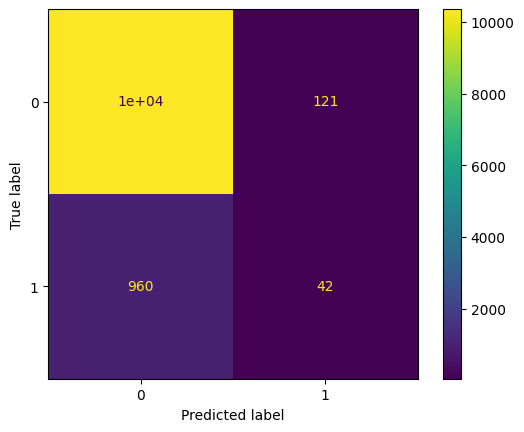

In [15]:
visualizacion=ConfusionMatrixDisplay(matriz_confucion)
visualizacion.plot();#con le punto y coma se extrae esa parte si no, tendriamos que importar
#matplotlip para usar el plt.show

en el eje y tenemos los valores reales 0 siendo cumplido y 1 siedno moroso, en el eje x tenemos los valores vebistos 0 siedno cumplido y 1 siendo moroso

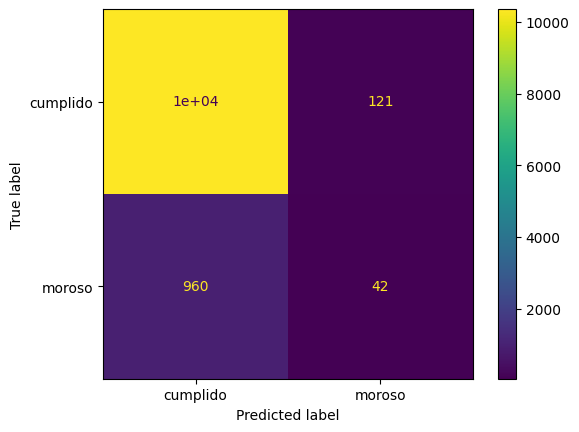

In [16]:
visualizacion=ConfusionMatrixDisplay(confusion_matrix=matriz_confucion,display_labels=['cumplido','moroso'])
visualizacion.plot();#ahora para mayor visualizacion vamos a poner parametros para asi entender mejor la informacion

que quiere decri la matriz de confucion: nos dice que nuestro modelo predijo de todo el conjunto de datos, que tuvimos mas 10000 clientes cumplidos, pero que tuvimos 957 clientes que se clasificaron como cumplidos pero que son morosos siendo esto un riesgo grande por la cantidad que son, 123 que se clasificaron como morosos y que son cumplidos, unicamente identifico de formaefectiva 45 clientes que son morosos y de la misma forma mas de 10000 clientes que son cumplidos


estos numero aqui que nos van a permitir evaluar nuestro modelo para mejorarlo y asi poder preorisar los casos en que los clientes son morosos, asi tener un mejor filtro para los filtros, dadoq ue por ejemplo le dejariamos de dar prestamos a 123 clientes que si nos pagarian bien pero le seguimos dando prestamos a 957 clientes que no nos pagarian bien, entonces aqui estamos asumiendo un riesgo muy grande o potencialmente

####Entendiendo la matriz de confusión

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.

En la representación general de una matriz de confusión, para más detalles analiza la imagen a continuación, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificación. Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.

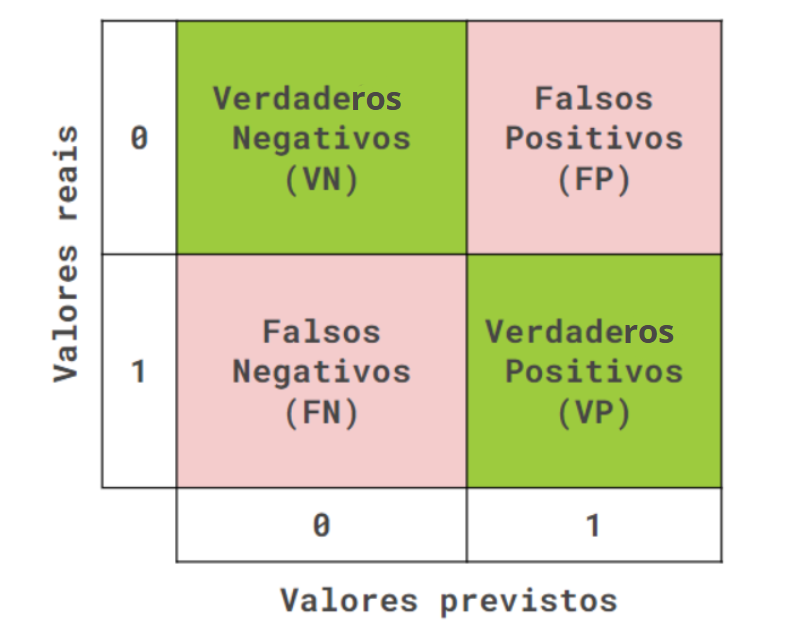

Cada elemento de la matriz está identificado por un nombre de acuerdo con la intersección entre la predicción y el valor real. La diagonal principal de la matriz, que está destacada por el color verde, representa los elementos que tienen la predicción igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que está destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripción de cada uno de los elementos es la siguiente:


* Verdaderos Negativos (VN): Cuando el valor real es 0 y la predicción también es 0. Indica que el modelo clasificó correctamente los valores de la clase negativa.

* Falsos Positivos (FP): Cuando el valor real es 0 y la predicción es 1. Indica que el modelo clasificó erróneamente un elemento de la clase negativa como si fuera de la clase positiva.

* Falsos Negativos (FN): Cuando el valor real es 1 y la predicción es 0. Indica que el modelo clasificó erróneamente un elemento de la clase positiva como si fuera de la clase negativa.

* Verdaderos Positivos (VP): Cuando el valor real es 1 y la predicción también es 1. Indica que el modelo clasificó correctamente los valores de la clase positiva.

Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.

##Metodo RandomForestClassifier

Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo RandomForestClassifier. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
modelo_random_forest=RandomForestClassifier(max_depth=10)
modelo_random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [19]:
print(f'Precision del modelo de entrenamiento es:{modelo_random_forest.score(x_train,y_train)}')
print(f'Precision del modelo de validadcion es: {modelo_random_forest.score(x_val,y_val)}')

Precision del modelo de entrenamiento es:0.9153890824622531
Precision del modelo de validadcion es: 0.9128995732079087


al observar el porcentaje de precision podemos observar que tuvo un pocentaje mejor que el del arbol de decision tanto en entrenamiento como en prueba

Matriz de decision

In [20]:
y_previsto_forest=modelo_random_forest.predict(x_val)
matriz_confucion_forest=confusion_matrix(y_val,y_previsto_forest)
print(matriz_confucion_forest)

[[10476     3]
 [  997     5]]


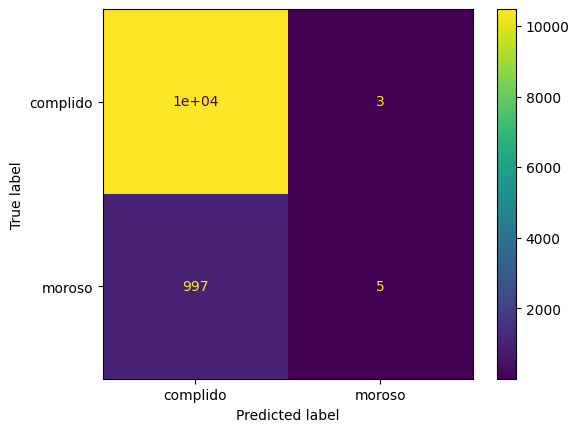

In [21]:
visualizacion_forest=ConfusionMatrixDisplay(confusion_matrix=matriz_confucion_forest,display_labels=['complido','moroso'] )
visualizacion_forest.plot();

al ver la grafica de decision podemos observar que el modelo randomforest no logra detectar casi ningun cliente moroso como el modelo anterior aun teniendo un porcentaje mayor

#### Lo que aprendimos

* Crear un modelo de clasificación usando Scikit-Learn;
* Validar modelos a partir de la división de datos de entrenamiento, validación y prueba;
* Evaluar el rendimiento de los modelos usando la precisión;
* Analizar los aciertos y errores del modelo con la matriz de confusión.

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

metricas para evaluar

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

precision:son los verdaderos positivos dividido entre verdaderos positivos mas falsos positivos

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [23]:
45/(45+123)

0.26785714285714285

In [24]:
print(f' la presicion del modelo es: {precision_score(y_val,y_previsto)}')
print(f' la sencibilidad(recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f' la exactitud del modelo es: {accuracy_score(y_val,y_previsto)}')

 la presicion del modelo es: 0.25766871165644173
 la sencibilidad(recall) del modelo es: 0.041916167664670656
 la exactitud del modelo es: 0.9058444386377493


In [25]:
print(f' la presicion del modelo es: {f1_score(y_val,y_previsto)}')#penalisa el modelo, entre mas lejos de 1 el modelo se desempeña mal

 la presicion del modelo es: 0.07210300429184549


####cuándo usar cada métrica

**Exactitud**

Es la métrica más común y básica en problemas de clasificación. **Se utiliza para medir la proporción de datos previstos correctamente por el modelo en relación al total de los datos.** Esta métrica es útil cuando las clases de la variable objetivo están balanceadas, es decir, cuando hay una cantidad equilibrada de datos para cada clase y una importancia equivalente de clasificación entre las categorías. Como ejemplo de utilización, tenemos el reconocimiento de dígitos manuscritos. Podemos utilizar imágenes de caracteres de letras y números para entrenar un modelo de clasificación para identificar correctamente la escritura. Como cada letra o número no tiene una importancia mayor que los demás, la exactitud se convierte en una buena métrica para medir la capacidad del modelo en clasificar correctamente los dígitos.

A continuación, podemos analizar el cálculo de la exactitud a partir de la matriz de confusión. Se calcula sumando los aciertos del modelo (VN + VP) y dividiendo por todos los aciertos y errores (VP + VN + FP + FN).



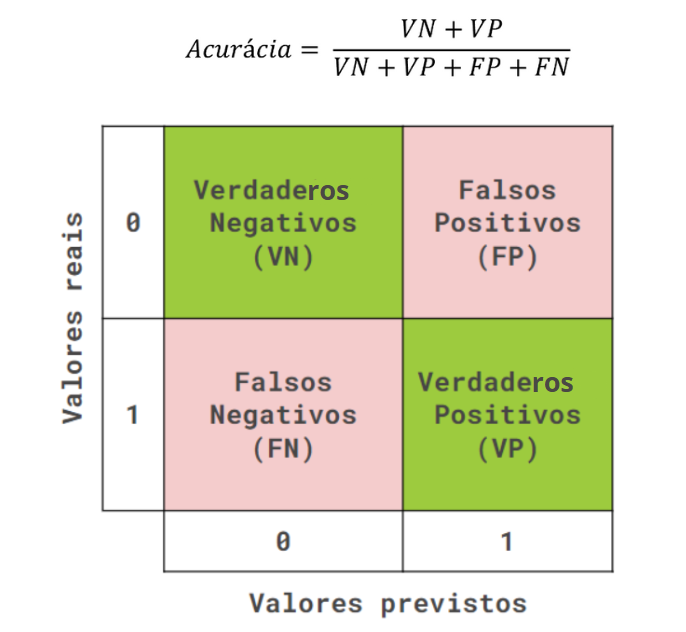

Recuperación (recall)

Mide la proporción de datos positivos que fueron correctamente identificados por el modelo, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos positivos como negativos. Se usa cuando el riesgo o costo de clasificar falsos negativos es alto. Por ejemplo, en casos de diagnóstico de enfermedades graves, donde es fundamental detectar correctamente la presencia de la enfermedad.

A continuación, podemos constatar el cálculo del recall a partir de la matriz de confusión. El recall solo toma en cuenta los valores positivos reales, es decir, los valores de la segunda fila de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos reales (VP + FN):

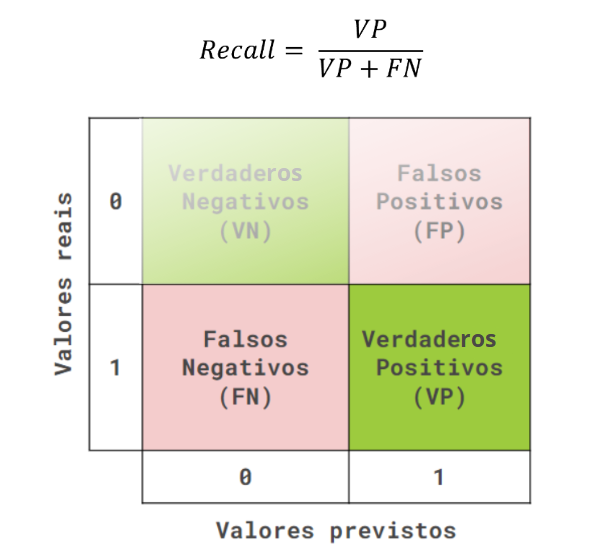

**Preciosion**

Mide la proporción de datos clasificados como positivos que son realmente positivos, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos negativos como positivos. Se usa cuando el riesgo o costo de clasificar falsos positivos es alto, por ejemplo, en casos de selección de acciones en el mercado financiero, donde lo importante es seleccionar acciones que tengan gran probabilidad de retorno, reduciendo la cantidad de acciones malas (falsos positivos) incluso si otras buenas acciones no han sido detectadas por el modelo (falso negativo). La precisión también es importante en el ejemplo de detección de enfermedades, donde queremos evitar que pacientes sanos sean erróneamente clasificados como enfermos.

A continuación, podemos analizar el cálculo de la precisión a partir de la matriz de confusión. La precisión solo toma en cuenta los valores positivos previstos por el modelo, es decir, los valores de la segunda columna de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos previstos (VP + FP):

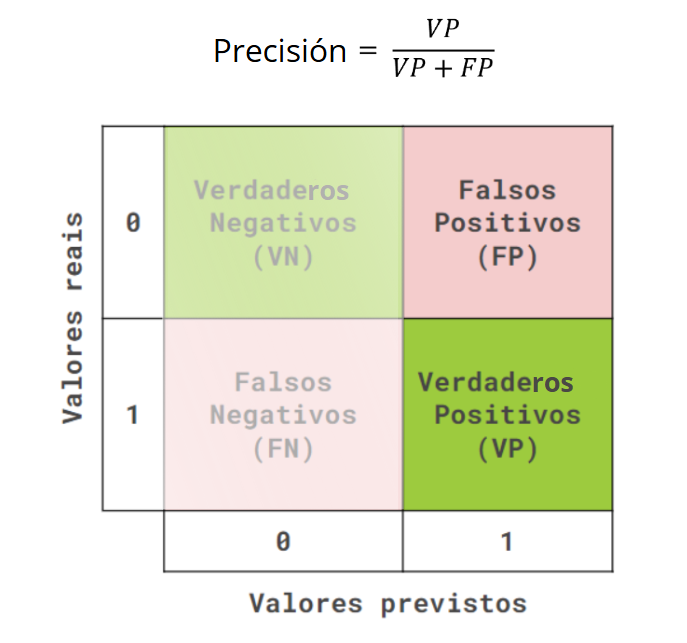

F1-Score

Proporciona un equilibrio entre el recall y la precisión, siendo útil cuando las clases de la variable objetivo están desbalanceadas, es decir, cuando hay una cantidad de datos muy diferente para cada clase. Además, es aplicable cuando el riesgo o costo de falsos positivos y de falsos negativos es alto simultáneamente. En casos de detección de tumores en pacientes, es necesario tener un equilibrio entre evitar errores en la detección de tumores cuando la persona realmente los tiene y evitar errores al informar que una persona tiene un tumor cuando en realidad no lo tiene.

El cálculo del F1-Score se realiza a partir de la media armónica entre la precisión y el recall. Por lo tanto, equivale a 2 veces la precisión por el recall, dividido por la suma entre la precisión y el recall:

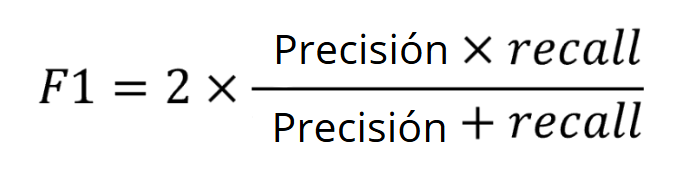

La elección de la métrica de clasificación adecuada depende del problema que se está resolviendo y de cada escenario. En los casos en que las clases están balanceadas y tienen importancia similar, la exactitud puede ser una buena métrica inicial. Sin embargo, cuando las clases están desequilibradas o los errores tienen costos diferentes, métricas como precisión, recall y F1-score son más indicadas.

### Curva ROC (caracteristica reseptiva del receptor)

In [26]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




con python y sklearn podemos medir como esta la curba AUC de nuestro modelo

In [27]:
from sklearn.metrics import RocCurveDisplay

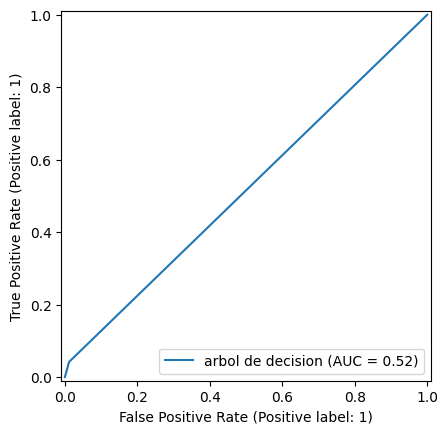

In [28]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='arbol de decision');

al ver crecio y de ahi se fue recta, la recta nos dice que es aletoriedad lo que nos indica que entre mas ce acerca a esta los resultados son mas aleatorios en la curva roc, lo cual nos indica que el modelo no clasifica bien auqnue tiene una exactitud del 90% quedando claro que es un modelo decificnte

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
print(f'El area bajo la curva roc es: {roc_auc_score(y_val,y_previsto)}')

El area bajo la curva roc es: 0.5151846321671001


essta es una forma de validad nuestro modelo

La curva ROC (Receiver Operating Characteristic) es una herramienta utilizada para evaluar el desempeño de un modelo de clasificación binaria. Se utiliza especialmente cuando se trabaja con probabilidades o scores, no solo etiquetas (0/1), y cuando queremos analizar cómo varía la sensibilidad y la especificidad según distintos umbrales de decisión.

✅ ¿Qué es la curva ROC?
Es una gráfica que representa la relación entre:

TPR (True Positive Rate) = Sensibilidad =
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
TP+FN
TP
​


FPR (False Positive Rate) =
1
−
Especificidad
=
𝐹
𝑃
𝐹
𝑃
+
𝑇
𝑁
1−Especificidad=
FP+TN
FP
​


Cada punto de la curva corresponde a un umbral distinto (threshold) aplicado a la probabilidad para decidir si la clase es 1 o 0.

Ejes de la curva:

X: Tasa de falsos positivos (FPR)

Y: Tasa de verdaderos positivos (TPR)

Interpretación:

Una curva más cercana a la esquina superior izquierda indica un mejor modelo.

Una curva cerca de la diagonal (línea 45°) indica que el modelo es casi aleatorio.

Una curva por debajo de la diagonal indica un modelo peor que el azar.

✅ AUC (Area Under Curve)
Es el área bajo la curva ROC. Valores típicos:

1.0: Modelo perfecto

0.9 - 1.0: Excelente

0.8 - 0.9: Muy bueno

0.7 - 0.8: Aceptable

0.5: Aleatorio

### Curva de  precisión x sensibilidad

In [31]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [32]:
from sklearn.metrics import PrecisionRecallDisplay

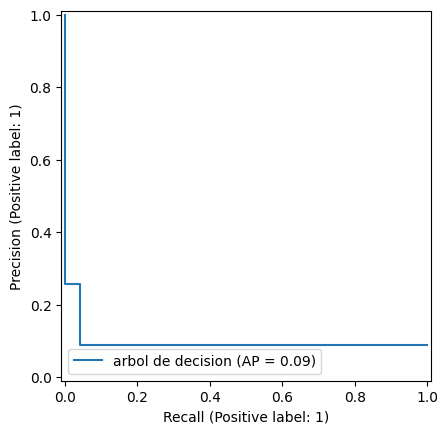

In [33]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='arbol de decision');

aqui observamos el 26 y el 4 porciento de nuestros datos, ais mismo el promedio de el AP=0.09, la idea es que quede en 1 por lo tanto esto es deficiente

In [34]:
from sklearn.metrics import average_precision_score

In [35]:
print(f'El promedio de peciosion vs recall es: {round(average_precision_score(y_val,y_previsto),3)}')

El promedio de peciosion vs recall es: 0.094


 ¿Qué es la curva Precisión-Sensibilidad (Precision-Recall Curve)?
Es una representación gráfica que muestra la relación entre:

Precisión (Precision):

Precision
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP
TP
​

→ De todos los positivos que predijo el modelo, ¿cuántos son realmente positivos?

Sensibilidad (Recall o TPR):

Recall
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
Recall=
TP+FN
TP
​

→ De todos los positivos reales, ¿cuántos encontró el modelo?

Cada punto de la curva representa un umbral distinto (threshold) para decidir la clase positiva.

✅ ¿Por qué usarla?
Es más informativa que la curva ROC cuando:

Hay desbalance de clases (ej.: 99% negativos y 1% positivos).

Nos interesa el trade-off entre capturar positivos (recall) y evitar falsos positivos (precision).

Mientras que la curva ROC puede dar una falsa impresión de buen rendimiento en datos desbalanceados, la curva Precision-Recall refleja mejor la calidad del modelo.

✅ Interpretación
Curva alta y hacia la esquina superior derecha = mejor modelo.



✅1. Baseline en la curva Precision-Recall
El baseline es la precisión esperada si predices al azar.

Si el 10% de tus datos son positivos, y clasificas al azar, tu precisión promedio será 0.10.

Por eso, en la curva Precision vs Recall, se suele dibujar una línea horizontal en 0.10 para comparar tu modelo con el azar.

No tiene nada que ver con que AP = 1, es solo la referencia mínima esperada.

✅ 2. AP (Average Precision)
AP es el área bajo la curva Precision-Recall, no un promedio simple, sino una integral ponderada:

AP
=
∫
0
1
Precision
(
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
)

𝑑
(
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
)
AP=∫
0
1
​
 Precision(Recall)d(Recall)
Rango del AP:

1.0 = Modelo perfecto (Precisión = 1 en todos los niveles de Recall).

Cercano al baseline (ej. 0.10) = Modelo casi aleatorio.

En la gráfica, AP se suele mostrar como:




```
ini
AP = 0.87
```


Eso indica la calidad global del modelo (cuanto más cerca de 1, mejor).

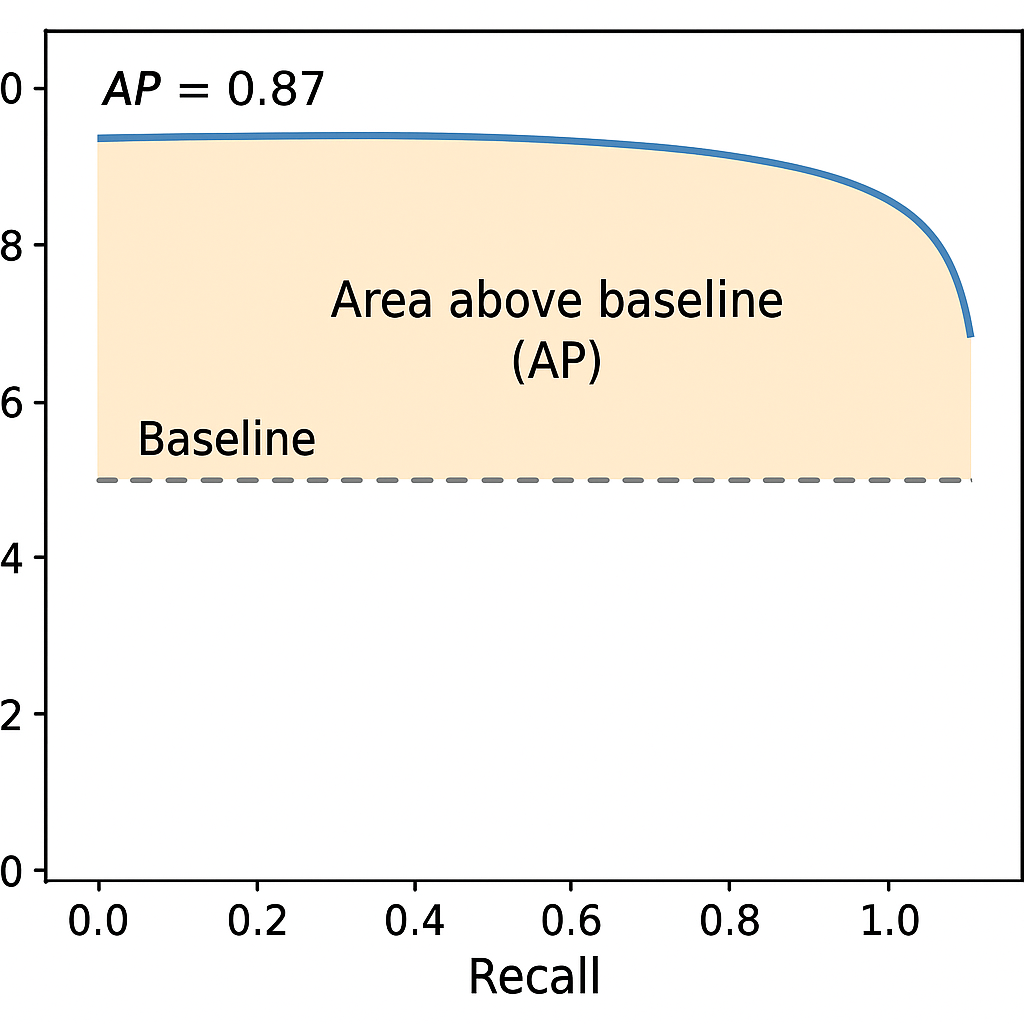

 ROC vs Precision-Recall: ¿Cuándo usar cuál?

ROC Curve: Buen equilibrio si las clases están balanceadas.

Precision-Recall Curve: Mejor para clases muy desbalanceadas porque enfatiza el rendimiento en la clase positiva.

### Informe de métricas

podemos tner tambien un recurso que es un informe de emtricas

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(f'{classification_report(y_val,y_previsto)}')

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



Tengo los puntajes de precisión, de recall, para cada una de las clases. Y, como estamos trabajando con recall, nota que este recall de 0.04 es, pues, deficiente, muy bajo. Y la precisión, también, de 0.27, pues, muy mal, ¿ok? Entonces, este modelo, realmente, no identificó bien a las personas morosas, porque en las personas morosas es lo que estamos tratando de clasificar.

También, en la parte inferior, tenemos la exactitud. A pesar de aparecer el puntaje de exactitud de 0.91, ¿verdad? Bajo F1 score, realmente, es la exactitud. O sea, está tomando, haciendo la medida, como los cálculos que previamente mostramos. Entonces, es del 91%, pero eso no quiere decir que mi modelo esté clasificando bien, ¿ok? Entonces, es un punto muy importante.

También, tenemos el promedio general, ¿verdad? Que es lo que toma, es el valor de precisión. Lo suma y lo divide entre 2. Y lo mismo aquí para recall. Entonces, nota que el promedio general para la precisión es 0.59. Para recall, 0.52. El F1 es 0.51, siempre tomando como referencia las 11,500 muestras que tengo en el conjunto de entrenamiento y validación.

Y el promedio ponderado, ¿verdad? Adicionalmente, tiene en cuenta las muestras, ¿ok? Entonces, en este caso, el promedio ponderado es calculado precisión veces soporte, ¿verdad? Dividido por la cantidad de muestras que hay. Y lo mismo para la clase 1. Entonces, precisión veces soporte dividido por la cantidad de muestras. Entonces, aquí, este desbalanceo hace que lleguemos a estos promedios ponderados que acaban favoreciendo la clase más frecuente, que serían las personas clientes cumplidas, ¿ok?

Este informe de métricas es bastante útil

####Lo que aprendimos

* Seleccionar la métrica de clasificación más coherente de acuerdo con el problema;
* Extraer precisión, exactitud y recall a partir de la matriz de confusión;
* Generar gráficos de la curva ROC y precisión x recall usando la biblioteca Sklearn;
* Construir un informe con las principales métricas de rendimiento de modelos de clasificación.

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [38]:
from sklearn.model_selection import KFold,cross_validate

In [39]:
modelo=DecisionTreeClassifier(max_depth=10)
KFold=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,x,y,cv=KFold)
cv_resultados

{'fit_time': array([0.20680833, 0.19414473, 0.20151019, 0.19395113, 0.18993998]),
 'score_time': array([0.00276303, 0.00271463, 0.0027132 , 0.00272036, 0.00334549]),
 'test_score': array([0.91290147, 0.90744774, 0.90755662, 0.91343641, 0.89982578])}

el timepo que demoro para el fir, el tiempo que demoro en el puntaje y al final el puntaje

In [40]:
cv_resultados['test_score']

array([0.91290147, 0.90744774, 0.90755662, 0.91343641, 0.89982578])

como estimamos si esta generalizando bien y cual es el intervalo de confianza. Necesitamos calcular el promedio de estoss valores y luego el dessviao estandar
con esto calcularemos el intervalo de confianza= (promedio+2(desvioestandar))(promedio-2(desvioesstandar))

nota:la párte ssuperior no supere uno

algo que tenemos en tener encuenta es si el valor del promedio es 0.99 y el desvio estandar es de 0.02, el intervalo de confianza supera el 1 y esto es algo que no podemos permitir

In [41]:
promedio= cv_resultados['test_score'].mean()
desvio_std=cv_resultados['test_score'].std()
print(f'el promedio de la exactitud es de: {promedio}')
print(f'el desvio tipico   es de: {desvio_std}')
print(f'el intervalo de confianza es de: [{(promedio-2*desvio_std),((promedio+2*desvio_std))}]')

el promedio de la exactitud es de: 0.9082336040620691
el desvio tipico   es de: 0.00491173101275947
el intervalo de confianza es de: [(np.float64(0.8984101420365501), np.float64(0.9180570660875881))]


quiere decir que nuestro modelo independientemente como sea el peor desempeño sera de 0.89 y el mejor 0.918, pero esstamoss hablando de un modelo para el cual solo calculamos la exactitud pero la metrica que queremos mejorar y priorisamos es el recall, teniendo el valor de verdaderos positivos lo mas alto posible demodo que nuesstro modelo redusca el error tipo II

### Validación cruzada con sensibilidad

In [42]:
def intervalo_de_confianza(resultados):
  promedio= resultados['test_score'].mean()
  desvio_std=resultados['test_score'].std()
  print(f'el intervalo de confianza es de: [{(promedio-2*desvio_std),((promedio+2*desvio_std))}]')

In [43]:
from sklearn.model_selection import KFold,cross_validate
modelo=DecisionTreeClassifier(max_depth=10)
KFold=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,x,y,cv=KFold,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall
cv_resultados

{'fit_time': array([0.19742203, 0.19958425, 0.20586109, 0.20159554, 0.20715117]),
 'score_time': array([0.004426  , 0.00511575, 0.00530529, 0.00488353, 0.00528288]),
 'test_score': array([0.02642008, 0.02227723, 0.02091021, 0.01174935, 0.02312139])}

In [44]:
intervalo_de_confianza(cv_resultados)

el intervalo de confianza es de: [(np.float64(0.011055444927654283), np.float64(0.030735855323075198))]


aqui la validacion cruzada para la sensibilidad funciona exactamente ogial que los pasos anteriores, ssolo que agregamoss el tipo de puntaje recall y este tiene un desvio estandar bastante grande dado que tenemos un intervalo de 0.012 a 0.030

este modelo sigue siendo deficiente y no lo hemos mejorado solo hemos validado, utilizar diversas técnicas para la validación con diversas métricas de modo que podamos tomar acciones basados en los resultados que seamos data driven.

#####validación con otras métricas

Es siempre importante analizar el problema de negocio antes de evaluar un modelo de clasificación, para que se elija la métrica más adecuada. En nuestro proyecto, estamos clasificando clientes morosos de una agencia de alquiler de vehículos e identificamos que la métrica más relevante es el recall, que busca minimizar la cantidad de personas morosas que son clasificadas como cumplidoras.

Para obtener un resultado completo de las métricas en la validación cruzada así como el classification_report, es necesario utilizar el método cross_validate e informar en el parámetro scoring las métricas a evaluar.

Como desafío, construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

* Exactitud
* Recall
* Precisión
* F1-score


Un consejo es explorar la documentación del método cross_validate a partir de este material de apoyo, donde puedes descubrir una forma más simple de retornar las métricas de una sola vez con una lista de cadenas.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

In [45]:
from sklearn.model_selection import KFold,cross_validate
modelo=DecisionTreeClassifier(max_depth=10)
KFold1=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1=cross_validate(modelo,x,y,cv=KFold1,scoring=['recall','accuracy','precision','f1'])
cv_resultados

{'fit_time': array([0.19742203, 0.19958425, 0.20586109, 0.20159554, 0.20715117]),
 'score_time': array([0.004426  , 0.00511575, 0.00530529, 0.00488353, 0.00528288]),
 'test_score': array([0.02642008, 0.02227723, 0.02091021, 0.01174935, 0.02312139])}

In [46]:
def intervalo_de_confianza1(resultados):
  for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    promedio= resultados[metrica].mean()
    desvio_std=resultados[metrica].std()
    print(f'el intervalo de confianza ({metrica}) es de: [{(promedio-2*desvio_std),((promedio+2*desvio_std))}]')

In [47]:
intervalo_de_confianza1(cv_resultados1);

el intervalo de confianza (test_accuracy) es de: [(np.float64(0.8978577181033105), np.float64(0.918261062706941))]
el intervalo de confianza (test_recall) es de: [(np.float64(0.010895242485587419), np.float64(0.03129555625616809))]
el intervalo de confianza (test_precision) es de: [(np.float64(0.16585829795553103), np.float64(0.275112180713169))]
el intervalo de confianza (test_f1) es de: [(np.float64(0.02075025167947929), np.float64(0.056032311170586685))]


### Estratificando los datos

In [48]:
datos['moroso'].value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


este metodo nos ayuda a estratificar nuestros datos de resultado de hacer la matriz crusada, dado que al momento de hacerla nuestros datos siguen estando desiguales en proporcion, en las pruebas por ende es necesario realizar esta estratificacion

In [49]:
from sklearn.model_selection import StratifiedKFold

In [50]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,x,y,cv=skf,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall


In [51]:
intervalo_de_confianza(cv_resultados)

el intervalo de confianza es de: [(np.float64(0.01977887384916223), np.float64(0.039588313675160546))]


Cuando hicimos la matriz crusada, en la porprocion de muestra sy de entrenmaiento, puede haberse quedado con diferentes porcentaje de datos cada una de los rangos de muestra de evaluacion, es decir, que un segmente de entrenamkento tenga el 100 de cumplidos y nada de morosos o visebersa
Esto nos hace correr el riesgo de que nuestro algoritmo no rste haciendo una valudacion crusada efectuva

Por ende usamos un metodo de sklearn lena que es un metodo de estratificacion  Stratifiedkefol

Los pasos son iguales a los que ya hemosnrealuzado, y en ves de utilizar Kfold sera stratifiedkefold, se queda la misma de split, shuffle y el random_state igual a 5, con esto garantisamos que la porporcion de cada clase se mantenga, queremos que todos estos grupos independiente como queden tengan un porcentaje de la clase moroso, por ejemplo quedo el 10% en cada grupo estaria bien

El intervalo cambio del primer caso, siendo esta de 0.019 a 0.036, el desvio tipico aumento, pero al princripio estoy teneindo un intervalo de confianza con una variación que con este modelo puede presentar un puntaje de recall que varia de 1.9 y el 3.6 porciento no podemos esperar mas de este modelo y podemos notar un detalle dodne tenemos un conjunto de datos desequilibrado donde tenemos 50 mil registros que son personal cumplidas y casi 5 mil personas morosas por lo tento debemos mejorar la prevision

#### Otros metodos de validacion

Además de la validación cruzada con KFold tradicional y estratificada, existen otros tipos de validación que pueden ser utilizados en proyectos de machine learning. La elección de su uso dependerá de las características de los datos del proyecto. Vamos a explorar más adelante tres nuevos enfoques de separación de los datos utilizados para simular el proceso de aprendizaje en datos futuros.

GroupKFold

El método GroupKFold es una variación de la validación cruzada KFold tradicional y se utiliza cuando los datos tienen alguna estructura de grupo o dependencia que no debe ser rota, generalmente una característica en una de las columnas de la base de datos.

Este enfoque utiliza una estrategia de separación de los datos para que los registros pertenecientes a un grupo específico se mantengan juntos durante las divisiones del KFold, garantizando que no sean separados entre los conjuntos de entrenamiento y validación. Esto es útil para evitar posibles sesgos y garantizar que el modelo generalice para grupos desconocidos, es decir, incluso si no hay datos del grupo en el conjunto de entrenamiento, el modelo deberá tener un buen desempeño al predecir el resultado para los datos de ese grupo.

Leave-p-out

El método Leave-p-out funciona de manera diferente al método KFold. En lugar de dividir el conjunto de datos en una cantidad fija de conjuntos, se elegirá una cantidad 'p' de elementos para ser dejados fuera del entrenamiento. Los datos se entrenarán en el resto y se validarán solo en los 'p' elementos. Este proceso se repite hasta que todos los datos se utilicen como datos de validación. El resultado final puede considerarse el promedio de los resultados obtenidos en los modelos, tal como se hace en la validación cruzada tradicional.

Esto proporciona una validación mucho más completa, ya que considera todas las combinaciones posibles de datos de entrenamiento y validación. Sin embargo, es mucho más costosa computacionalmente, ya que se crearán muchos modelos y esto aumenta a medida que el conjunto de datos es muy grande y el valor elegido para 'p' es pequeño.

Leave-one-out

El método Leave-one-out es una forma especial del Leave-p-out, donde se elige el valor de p=1. De esta manera, solo se reserva una muestra para validación y todos los demás datos se eligen para entrenamiento. Este proceso se repite para todas las muestras de la base de datos. Esto significa que, si hay 1000 filas en la base de datos, se entrenarán 1000 modelos distintos.

Se espera que este método demande mucho computacionalmente, debido a la creación de un modelo para cada fila de la base de datos. Por lo tanto, se indica solo en los casos en que la base de datos es muy pequeña. En estas situaciones, es interesante utilizar la mayor cantidad de datos posible para el entrenamiento, para que el modelo pueda entender el patrón de los datos. Otra estrategia de validación cruzada eliminaría muchos datos que serían útiles en el entrenamiento.


Si deseas saber más sobre otros métodos de validación disponibles en la biblioteca Scikit-Learn, puedes consultar la documentación Validación cruzada: evaluando el desempeño del estimador.
https://scikit-learn.org/stable/modules/cross_validation.html


Si quieres crear una visualización para tener un mejor entendimiento de cómo se realizó la división de los datos en algún proyecto, ya sea con KFold, StratifiedKFold o GroupKFold, puedes explorar la documentación Visualizando el comportamiento de validación cruzada en scikit-learn.


https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html


####lo que aprendimos

* Utilizar la validación cruzada con KFold para obtener un resultado más coherente del desempeño de un modelo de clasificación;
* Ejecutar la validación cruzada con diferentes métricas de evaluación;
* Realizar la validación cruzada estratificada en conjuntos de datos desbalanceados;
* Entender las ventajas y desventajas de los diferentes métodos de validación.

## <font color='dark'>Balanceo de los datos</h1>

ante la problematica que los datos esten desvalanciados como es el caso de que los morosos son pocos, existe la tecnica de balanceo de datos, que son tecnicas que nos permitan identificar esta frotnera de decision, para llegar de forma mas precisa

### Oversampling

generamos datos sinteticos apartir de la clase que es la minoria de los datos, generando datos aleatorios para que nos hacerque al total de muestras que es la mayor

nos apollaremos de la biblioteca imbalanced-learn modulo smote, que es un algoritmo que nos permite facilitar este proceso de generacion aleatoria

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
oversampling=SMOTE()
x_balanceada,y_balanceada=oversampling.fit_resample(x,y)

In [54]:
y_balanceada.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


nos muestra la porporcion de que moroso nos quedo 50% cumplidos y 50% clientes cumplidos, al ejecutarlo sin porcentaje es de 41912, esto es para emular el comportamiento cuando el cliente es moroso

el sigueinte paso es intanciar el modelo de nuevo

In [55]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall

lo unico que cambia es que ahora son datos sinteticos x_balanceado,y_balanciado

In [56]:
intervalo_de_confianza(cv_resultados)

el intervalo de confianza es de: [(np.float64(0.716250242573221), np.float64(0.7632789246495443))]


al observar el modelo con smot nos trae metricas totalmente diferentes, que paso de 2% de recall, a 70%, lo que esperamos de este modelo al ser entrenado con oversampling es que mi modelo generaliza entre el 70% a 75%, pero que tan confiable es este ejercicio dado que generamos mas de 49mil datos de forma sintetica, pero esto lo podemos generar apartir de una payplan de forma secuencial, para llegar a estos resultados de nuestro modelo de forma exasutiva a diferencia de la forma manual

#### balanceo de datos

En problemas de clasificación, podemos encontrarnos con bases de datos en las que la variable objetivo contenga clases muy desbalanceadas, es decir, categorías con frecuencias muy diferentes. Al entrenar un modelo con la variable desbalanceada, puede ser que el patrón de los datos para la clase dominante sobresalga en relación a la clase con menor frecuencia, generando un modelo con un desempeño muy bajo para clasificar la clase de menor frecuencia.

Para sortear estos problemas generados por la base de datos desbalanceada, podemos recurrir a dos soluciones que consisten en equilibrar los datos de la variable objetivo: undersampling y oversampling. Estas estrategias son útiles para que el modelo pueda comprender mejor el patrón de los datos, pero es importante destacar que también tienen desventajas y consideraciones que debemos analizar antes de utilizarlas.

Oversampling

La estrategia de oversampling consiste en aumentar la cantidad de datos de la clase que tiene menor frecuencia hasta que tenga la misma cantidad que la clase de mayor frecuencia. De esta manera, el modelo prestará más atención al patrón de los datos de la clase que tenía menor frecuencia al principio y podrá diferenciar mejor las dos clases.

Para aumentar la cantidad de datos necesitamos generar nuevos registros en la base de datos. Es posible utilizar un oversampling aleatorio para duplicar registros de manera aleatoria o usar una técnica como SMOTE para generar datos sintéticos con un patrón cercano a los datos existentes. La desventaja de esta estrategia es la posibilidad de sobreajuste del modelo, especialmente al utilizar el oversampling aleatorio. En este caso, el modelo puede especializarse demasiado en el patrón de los datos que son muy parecidos o idénticos, ya que son copiados o generados sintéticamente.

Undersampling

La estrategia de undersampling es contraria al oversampling y consiste en reducir la cantidad de datos de la clase que tiene mayor frecuencia hasta que tenga la misma cantidad que la clase de menor frecuencia. De esta forma, el modelo no prestará atención solo a los datos de mayor cantidad y podrá diferenciar mejor las dos clases.

Para reducir la cantidad de datos, necesitamos eliminar o borrar registros existentes. Es posible utilizar un undersampling aleatorio para seleccionar los registros que se mantendrán o usar técnicas que seleccionan o eliminan datos a partir de un patrón establecido. La principal desventaja de la estrategia de undersampling es la eliminación de datos que pueden ser muy importantes para la comprensión del problema, especialmente cuando esta eliminación se realiza sin ningún criterio, como es el caso del undersampling aleatorio.



Ambas estrategias son válidas para intentar mejorar el desempeño de un modelo de clasificación, pero debemos estar atentos al utilizarlas debido a los puntos negativos que son inherentes a cada uno de los métodos. En cualquier proyecto que utilice alguna de estas herramientas, se debe realizar un análisis para identificar si realmente ayudaron o perjudicaron el desempeño del modelo de clasificación.

####biblioteca imblearn

La clasificación de datos desbalanceados puede convertirse en una tarea bastante desafiante, ya que el enfoque tradicional de entrenar un modelo utilizando estos datos a menudo lleva a resultados muy insatisfactorios, donde el modelo tiende a favorecer la clase con mayor cantidad de datos en detrimento de la otra.

Para abordar este tipo de situación, la biblioteca imbalanced-learn(https://imbalanced-learn.org/stable/index.html), abreviada como imblearn, ofrece diversas técnicas y herramientas con el objetivo de equilibrar la distribución de las categorías de la variable objetivo y mejorar el rendimiento de los modelos de machine learning. Las técnicas consisten en algoritmos de reamostrado de oversampling, undersampling y algoritmos que combinan ambas estrategias simultáneamente.

Algunos de los algoritmos de oversampling de la biblioteca:

RandomOversampler(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

SMOTE(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

ADASYN(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)

KMeansSMOTE(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

Algunos de los algoritmos de undersampling de la biblioteca:

RandomUnderSampler(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

NearMiss(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html)

ClusterCentroids(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html)

TomekLinks(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

Algoritmos que combinan las dos técnicas de oversampling y undersampling:

SMOTEENN(https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)

SMOTETomek(https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

Además de las técnicas de balanceo de datos, la biblioteca proporciona herramientas para la construcción de pipelines de datos(https://imbalanced-learn.org/stable/references/pipeline.html), algoritmos de machine learning(https://imbalanced-learn.org/stable/references/ensemble.html) para datos desbalanceados y cálculos de métricas de rendimiento de modelos(https://imbalanced-learn.org/stable/references/metrics.html).


### Pipeline para validación

nuestro modelo hasta ahrotia esta funcionando bien dado que estamos trabajando el modelo con datos balanceados, usando el oversampling pero al momento de validad nuestros datos entraran desvalanceados, la idea es usar pipeline para validacion de datos mediante invalance learn

In [57]:
from imblearn.pipeline import Pipeline as imbpipeline #dado que se trata de una desvalanciada por nuestros datos
#asi no generar confucion con una pipeline normal

esta es una secuencia de tareas que nosotros ejecutamos, lo que haremos  es llevar una secuencia en todo nuestro proceso de entrenamiento y validacion utilizando desde luego SMOT

In [58]:
modelo= DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

In [59]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3=cross_validate(pipeline,x,y,cv=skf,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall


Entonces, nuestro pipeline va a tomar nuestra X, va a hacer el oversampling lógicamente con X y Y para entrenar el modelo, pero al momento de realizar la validación, no va a validar con datos irreales, sino que va a mantener las proporciones que el dataset original contiene. Esa es la forma correcta de realizar este tipo de validación con oversampling.

In [60]:
intervalo_de_confianza(cv_resultados3)

el intervalo de confianza es de: [(np.float64(0.20196705648540675), np.float64(0.2954112206681513))]


### Undersampling

este metodo en ves de generar datos sinteticos, toma la clase de la mayoria y la reduce de modo que podamos tener los datos mas aprecidos, si no que el patron de datos que utilisamos para esta reduccion se hacemeje o tenga unas caractetisticas que faciliten de cierta forma esta generalizacion a la hora de modelar- usamos el metodo learnest

es un algoritmo que ahce esta reduccion de muestras de forma inteligente para poder generalisar bien con el conjunto de datos   

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [61]:
from imblearn.under_sampling import NearMiss

In [62]:
modelo= DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('undersample',NearMiss(version=3)),('arbol',modelo)])
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4=cross_validate(pipeline,x,y,cv=skf,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall


In [63]:
intervalo_de_confianza(cv_resultados4)

el intervalo de confianza es de: [(np.float64(0.6243480454160543), np.float64(0.6986577982768359))]


#### verisones del nearmiss

El desequilibrio de clases es un problema común en tareas de clasificación en machine learning, como diagnósticos médicos, detección de fraudes y detección de anomalías, donde la frecuencia de ocurrencia de un evento es muy baja en relación con el total. Una de las estrategias para abordar este problema de datos desequilibrados es el undersampling, que busca reducir el número de muestras de la clase con mayor frecuencia.

Entre los algoritmos de undersampling, podemos mencionar el NearMiss, que consiste en seleccionar muestras de la categoría en mayor cantidad que tienen un patrón cercano a la categoría con menor cantidad, con el fin de preservar información importante para la modelación del problema. Al utilizar un criterio de selección de las muestras, este método es mucho más recomendado que el uso de un undersampling puramente aleatorio, que puede eliminar información relevante de los datos.

Para seleccionar las muestras, este algoritmo utiliza un método conocido como vecino más cercano. Este método se aplica en 3 pasos:

1er paso: se calculan distancias entre todas las muestras de la clase con mayor frecuencia y de la clase con menor frecuencia.

2º paso: a continuación, para cada muestra de la clase de menor frecuencia, se seleccionan n muestras de la clase de mayor frecuencia; por defecto, este número es 3 y de ahí proviene el nombre de vecinos más cercanos. Se seleccionan 3 vecinos más cercanos para cada muestra de la clase de menor frecuencia.

3er paso: a partir de los elementos que fueron seleccionados, ocurre un nuevo proceso de selección para que quede con la misma cantidad de elementos de la clase de menor frecuencia. Esta selección final tiene 3 versiones diferentes:

NearMiss versión 1: se calcula un promedio entre las distancias de los 3 vecinos más cercanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

NearMiss versión 2: se calcula un promedio entre las distancias de los 3 vecinos más lejanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

NearMiss versión 3: se divide en dos etapas. Primero, para cada elemento de la clase de menor frecuencia, se eligen y almacenan M vecinos más cercanos, por defecto M también es de 3 vecinos. Luego se calcula el promedio de las distancias entre los elementos almacenados y los elementos de la clase de menor frecuencia y se eligen aquellos que tengan la mayor media de distancia.

Si desea saber más sobre las versiones del NearMiss, consulte la documentación de imbalanced-learn

https://imbalanced-learn.org/dev/under_sampling.html#mathematical-formulation

### Probando el modelo

hemos visto que el metodo mejor para generar el modelo es mediante el undersample, que es para la validacion de este deribado a la desigualdad de mis datos, ahora vamos a generar todo de amnera automatica

In [64]:
#primer paso
undersample=NearMiss(version=3)
#segundo paso
x_balanceada,y_balanceada=undersample.fit_resample(x,y)


In [65]:
#paso 3 crear modelo
modelo= DecisionTreeClassifier(max_depth=10)
#paso 4 hacer el fit
modelo.fit(x_balanceada,y_balanceada)
#paso 5 hacer el y previsto
y_previsto=modelo.predict(x_test)#hemos hecho hasta el momento con las x de validacion y entrenamiento ahora usaremos la variable test de x
#haciendo la prevision con datos que nunca vio en xtest

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



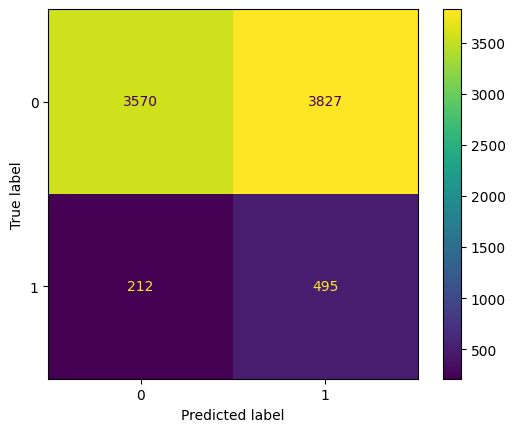

In [66]:
#paso 5 impresion y reporte
print(classification_report(y_test,y_previsto))
#paso 6 matriz de confucion
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

Entonces nota que aquí está nuestro modelo final ya probado con datos que nunca vio, lo entrenamos siguiendo las mejores prácticas, trabajamos lógicamente con un modelo de undersampling. O sea todo siguiendo todos estos patrones y llegamos entonces a este modelo interesante que logra predecir de forma correcta, 496 casos en los cuales se trata de un cliente moroso.

Entonces trajimos nuestra Y_test y nota que nuestro resultado de precisión, de recall, que es la métrica que queríamos priorizar aquí de la clase, que son morosos fue del 70%, entonces encuentra todo dentro de este rango, dentro de este intervalo de confianza, 70% y desde luego pues sacrificamos la precisión, quedó con precisión del 11%. ¿Cuál es el tradeoff?

Vuelvo a repetir, la idea de la empresa era dejar de perder dinero con clientes morosos porque no los estaban identificando correctamente. Ahora, están identificando correctamente a los clientes morosos, pero a cambio, podrían terminar prediciendo que clientes que son posiblemente buenos pagadores sean morosos. Por eso, estoy teniendo esta cantidad de falsos positivos, ¿ok?

Para la empresa, esto representa lógicamente un riesgo que va a asumir. La idea es que no vamos a prestar a tantas personas, ¿verdad? No vamos a financiar a tantas personas, pero a cambio, nos aseguraremos de identificar a los morosos antes de conocer las características de estos clientes morosos antes de prestarles. Vamos a proceder con pasos un poco más seguros aquí, trabajando con este modelo de Machine Learning (Aprendizaje Automático) para identificar a clientes morosos.

#### Utilizar oversampling y undersampling en datos desbalanceados;


Utilizar técnicas de balanceo de datos y entender sus ventajas y desventajas;
Aplicar un pipeline junto con la validación cruzada;
Probar modelos de clasificación.

#otros métodos de balanceo

Durante la clase, exploramos dos estrategias de balanceo de datos: oversampling y undersampling. En cada una de ellas utilizamos un algoritmo diferente, el SMOTE para generar nuevos datos sintéticos y el NearMiss para mantener datos que tienen un patrón cercano entre las clases.

Estos no son los únicos algoritmos existentes y el oversampling y undersampling no necesitan ser utilizados de manera aislada. Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea más efectiva en todas las ocasiones, pero es una opción que puede ser explorada en los proyectos.

Como desafío, utiliza el algoritmo SMOTEENN, que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.

Como un consejo, revisa la documentación del método SMOTEENN a partir de este enlace para identificar cómo importar el método y cómo utilizarlo.

https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html

In [67]:
from imblearn.combine import SMOTEENN

In [68]:
modelo= DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('SMOTEENN',SMOTEENN()),('arbol',modelo)])
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5=cross_validate(pipeline,x,y,cv=skf,scoring='recall')

In [69]:
intervalo_de_confianza(cv_resultados5)

el intervalo de confianza es de: [(np.float64(0.3369214195537777), np.float64(0.393438074968344))]


El recall de este modelo estuvo alrededor de 0.33 a 0.39, un poco mejor que el resultado usando solamente el oversampling, pero peor que el resultado del undersampling. Por lo tanto, esta estrategia no fue tan eficiente para este caso, pero eso no significa que no pueda ser utilizada en otros proyectos.